In [1]:
import sys

# Conda enviroment paths
sys.path.append('/home/vicente/anaconda3/envs/freecad-env/lib')
sys.path.append('/home/vicente/anaconda3/envs/freecad-env/Mod/Fem')

import ObjectsFem
import FreeCAD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [2]:
doc_name = 'cir_1250'

timeEnd = 18_000
timeStep = 3_600

timeArray = np.arange(timeStep, timeEnd+timeStep, timeStep, dtype=int)

doc = FreeCAD.open(f'files/{doc_name}/{doc_name}_therm.FCStd')

results_list = [doc.getObject(f'CCX_Time_{time}_0_Results') for time in timeArray]
mesh_obj = doc.getObject('MeshGmsh')
model_obj = doc.getObject('Container')

# Isometric view plots

In [3]:
max_temp = np.max([results.Temperature for results in results_list])
min_temp = np.min([results.Temperature for results in results_list])

print(f'Max Temperature: {max_temp} [K]')
print(f'Min Temperature: {min_temp} [K]')

cmap = plt.get_cmap('jet')
norm = mcolors.Normalize(vmin=min_temp, vmax=max_temp)

Max Temperature: 638.14 [K]
Min Temperature: 294.872 [K]


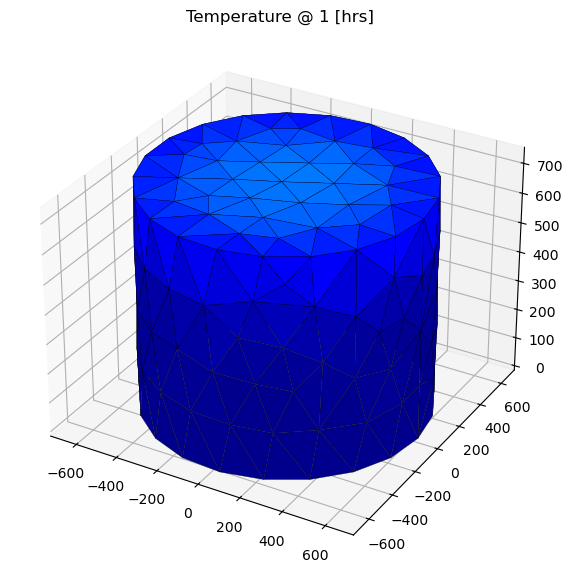

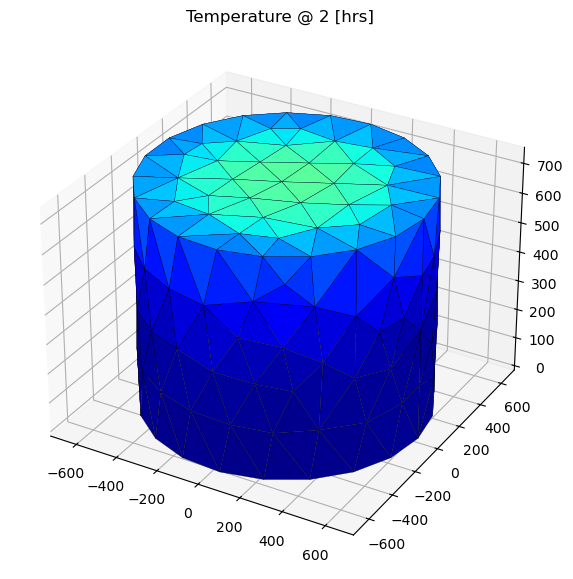

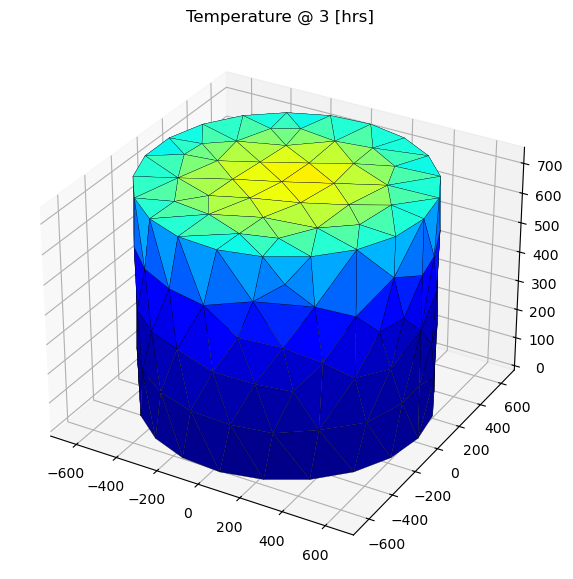

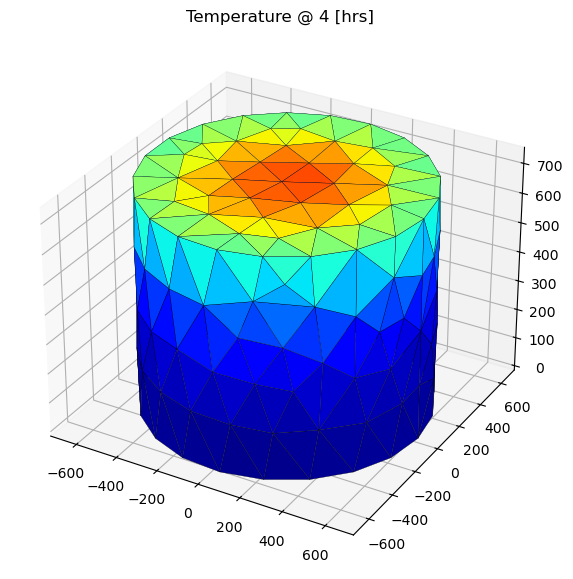

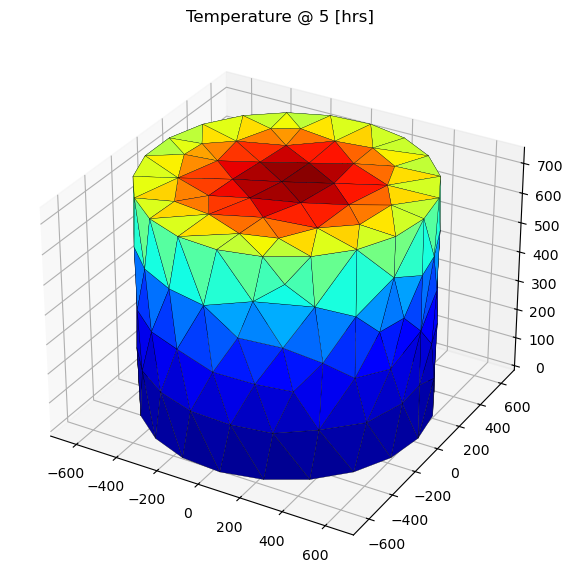

In [4]:
outer_faces_cir = [1, 2] # Face-3: Bottom; Face-2: Top
outer_faces_hex = [2, 1, 3, 7, 8, 6, 5] # Face-4: Bottom; Face-5: Top

nodes_dict = dict(mesh_obj.FemMesh.Nodes)

for i, results_obj in enumerate(results_list):
    
    all_faces_nodes_coords = []
    all_faces_temps = []
    
    for nFace in outer_faces_cir:
    
        face_idx = mesh_obj.FemMesh.getFacesByFace(model_obj.Shape.Faces[nFace-1])
        faces_nodes_coords, temps, displacement, strain = [], [], [], []
        
        for idx_f in face_idx:
            nodes_idx = mesh_obj.FemMesh.getElementNodes(idx_f)
            nodes_coords = [nodes_dict[idx_n] for idx_n in nodes_idx]
            
            temps_mean = np.mean([results_obj.Temperature[idx_n-1] for idx_n in nodes_idx])
    
            faces_nodes_coords.append(nodes_coords)
            temps.append(temps_mean)
    
        all_faces_nodes_coords.append(faces_nodes_coords)
        all_faces_temps.append(temps)
    
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    for faces_nodes_coords, temps in zip(all_faces_nodes_coords, all_faces_temps):
        poly3d = Poly3DCollection(faces_nodes_coords, facecolors=cmap(norm(temps)), linewidths=0.2, edgecolors='k')
        ax.add_collection3d(poly3d)
    
    plt.title(f'Temperature @ {i+1} [hrs]')
    plt.show()

Max Von Mises Stress: 398.5200454108696 [MPa]
Min Von Mises Stress: 0.013073285941193207 [MPa]


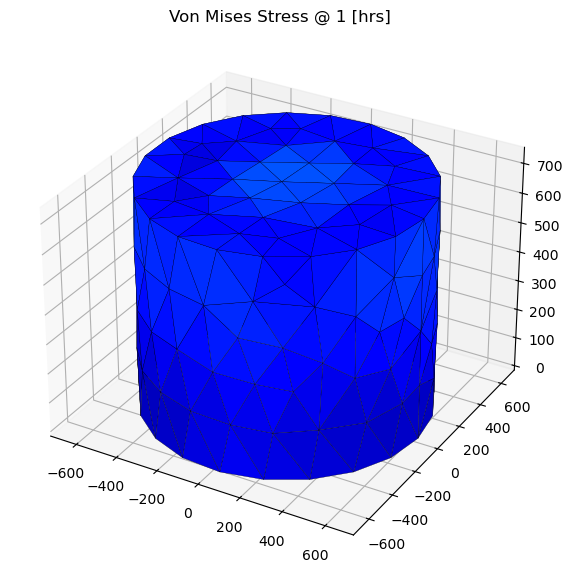

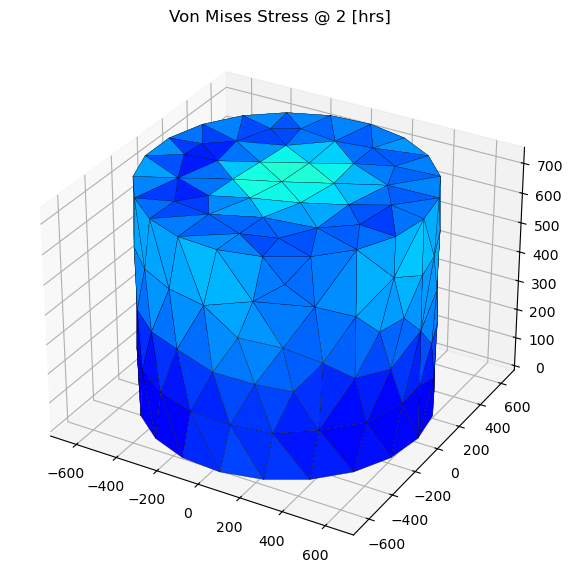

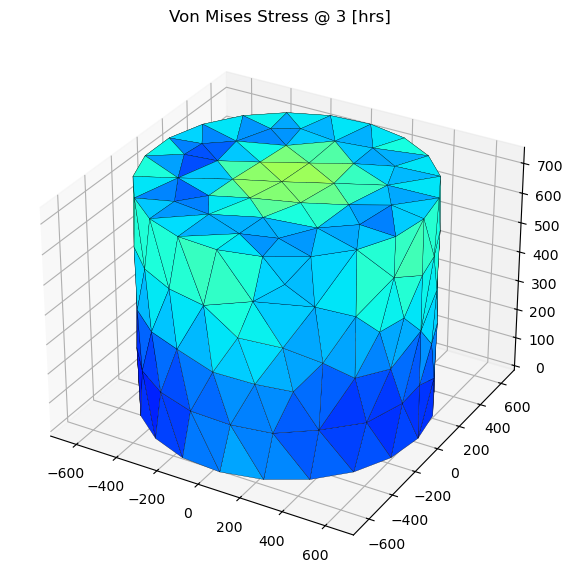

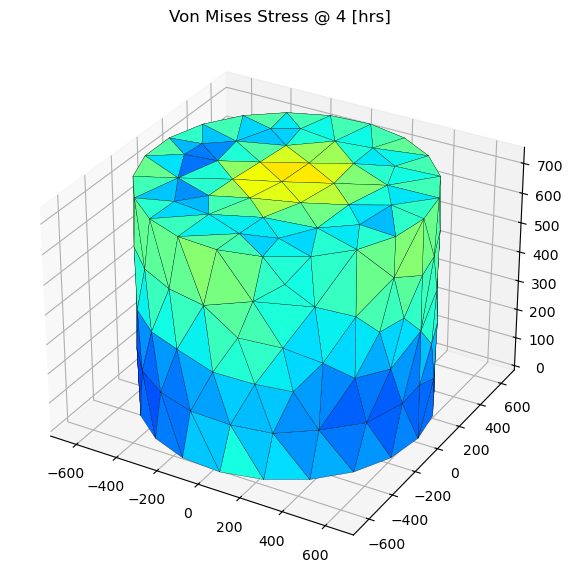

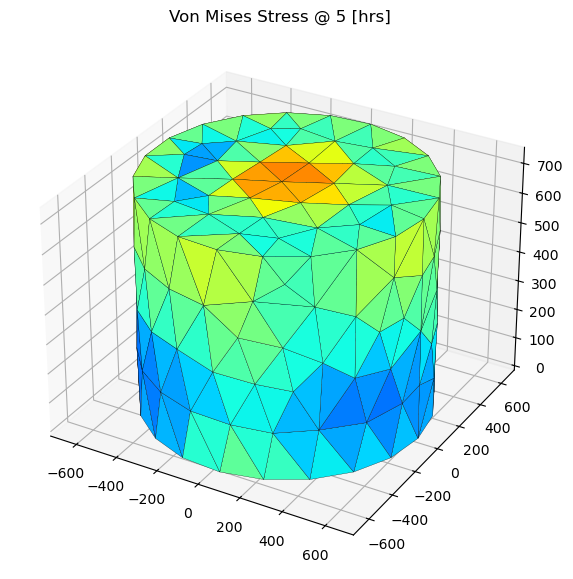

In [5]:
max_vm = np.max([results.vonMises for results in results_list])
min_vm = np.min([results.vonMises for results in results_list])

print(f'Max Von Mises Stress: {max_vm} [MPa]')
print(f'Min Von Mises Stress: {min_vm} [MPa]')

cmap = plt.get_cmap('jet')
norm2 = mcolors.Normalize(vmin=min_vm, vmax=max_vm)

outer_faces_cir = [1, 2] # Face-3: Bottom; Face-2: Top
outer_faces_hex = [2, 1, 3, 7, 8, 6, 5] # Face-4: Bottom; Face-5: Top

nodes_dict = dict(mesh_obj.FemMesh.Nodes)

for i, results_obj in enumerate(results_list):
    
    all_faces_nodes_coords = []
    all_faces_vm = []
    
    for nFace in outer_faces_cir:
    
        face_idx = mesh_obj.FemMesh.getFacesByFace(model_obj.Shape.Faces[nFace-1])
        faces_nodes_coords, vm, displacement, strain = [], [], [], []
        
        for idx_f in face_idx:
            nodes_idx = mesh_obj.FemMesh.getElementNodes(idx_f)
            nodes_coords = [nodes_dict[idx_n] for idx_n in nodes_idx]
            
            vm_mean = np.mean([results_obj.vonMises[idx_n-1] for idx_n in nodes_idx])
    
            faces_nodes_coords.append(nodes_coords)
            vm.append(vm_mean)
    
        all_faces_nodes_coords.append(faces_nodes_coords)
        all_faces_vm.append(vm)
    
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    for faces_nodes_coords, vm in zip(all_faces_nodes_coords, all_faces_vm):
        poly3d = Poly3DCollection(faces_nodes_coords, facecolors=cmap(norm2(vm)), linewidths=0.2, edgecolors='k')
        ax.add_collection3d(poly3d)
    
    plt.title(f'Von Mises Stress @ {i+1} [hrs]')
    plt.show()

Max Nodal Displacement: 2.659099753387225 [mm]
Min Nodal Displacement: 0.0 [mm]


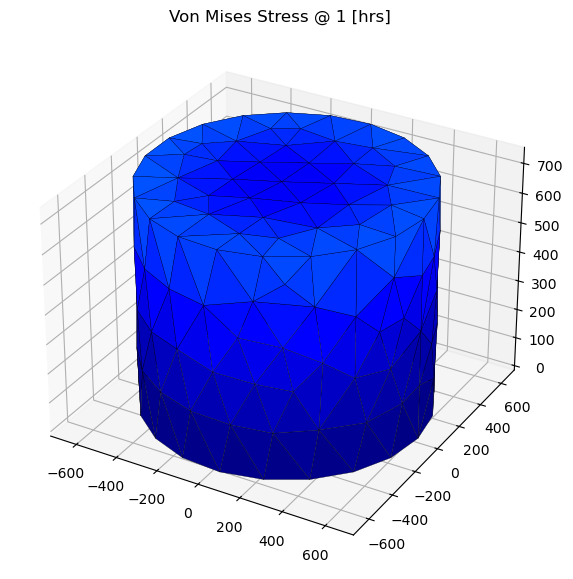

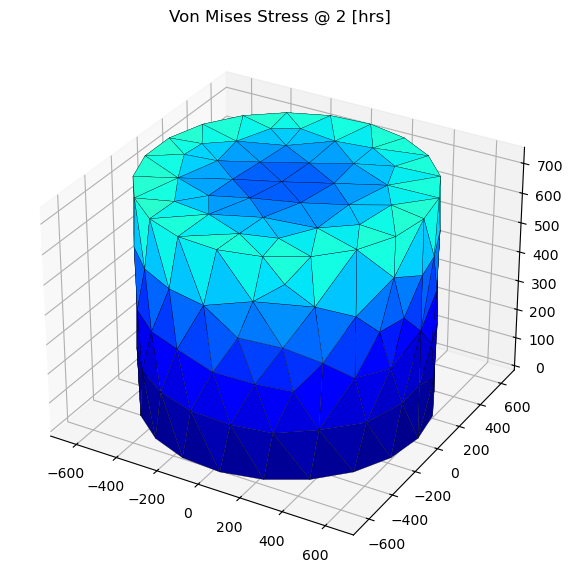

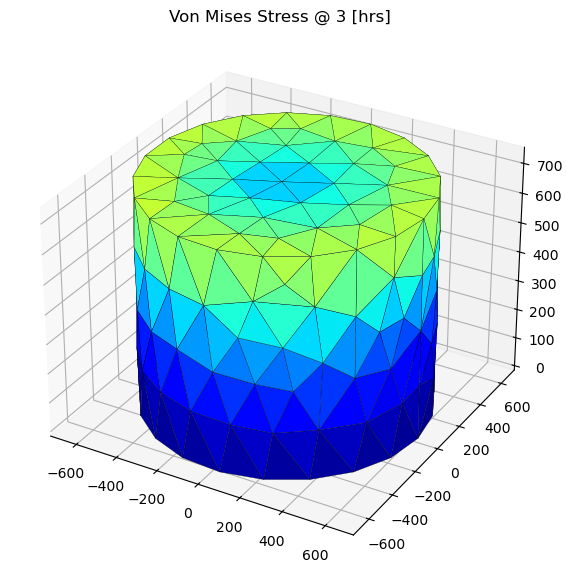

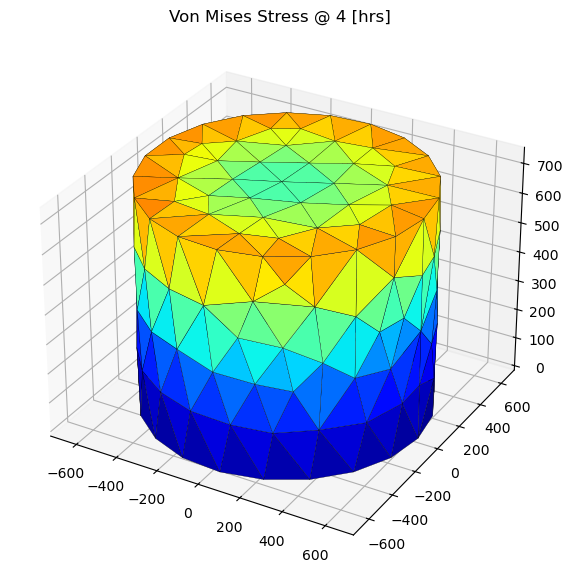

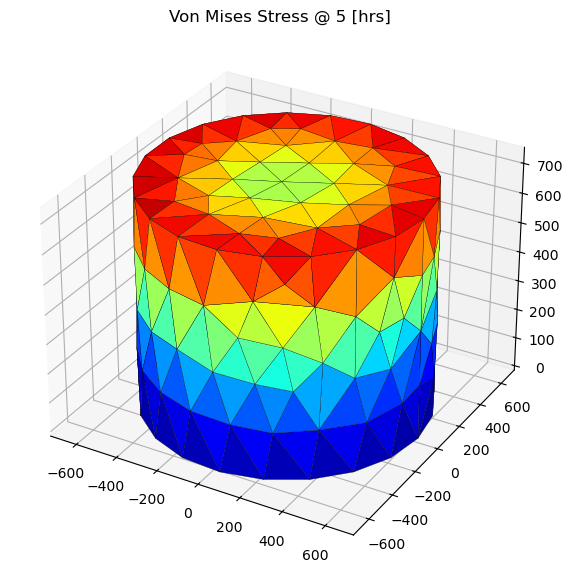

In [6]:
max_vm = np.max([results.DisplacementLengths for results in results_list])
min_vm = np.min([results.DisplacementLengths for results in results_list])

print(f'Max Nodal Displacement: {max_vm} [mm]')
print(f'Min Nodal Displacement: {min_vm} [mm]')

cmap = plt.get_cmap('jet')
norm2 = mcolors.Normalize(vmin=min_vm, vmax=max_vm)

outer_faces_cir = [1, 2] # Face-3: Bottom; Face-2: Top
outer_faces_hex = [2, 1, 3, 7, 8, 6, 5] # Face-4: Bottom; Face-5: Top

nodes_dict = dict(mesh_obj.FemMesh.Nodes)

for i, results_obj in enumerate(results_list):
    
    all_faces_nodes_coords = []
    all_faces_vm = []
    
    for nFace in outer_faces_cir:
    
        face_idx = mesh_obj.FemMesh.getFacesByFace(model_obj.Shape.Faces[nFace-1])
        faces_nodes_coords, vm, displacement, strain = [], [], [], []
        
        for idx_f in face_idx:
            nodes_idx = mesh_obj.FemMesh.getElementNodes(idx_f)
            nodes_coords = [nodes_dict[idx_n] for idx_n in nodes_idx]
            
            vm_mean = np.mean([results_obj.DisplacementLengths[idx_n-1] for idx_n in nodes_idx])
    
            faces_nodes_coords.append(nodes_coords)
            vm.append(vm_mean)
    
        all_faces_nodes_coords.append(faces_nodes_coords)
        all_faces_vm.append(vm)
    
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    for faces_nodes_coords, vm in zip(all_faces_nodes_coords, all_faces_vm):
        poly3d = Poly3DCollection(faces_nodes_coords, facecolors=cmap(norm2(vm)), linewidths=0.2, edgecolors='k')
        ax.add_collection3d(poly3d)
    
    plt.title(f'Von Mises Stress @ {i+1} [hrs]')
    plt.show()

# Transient plots

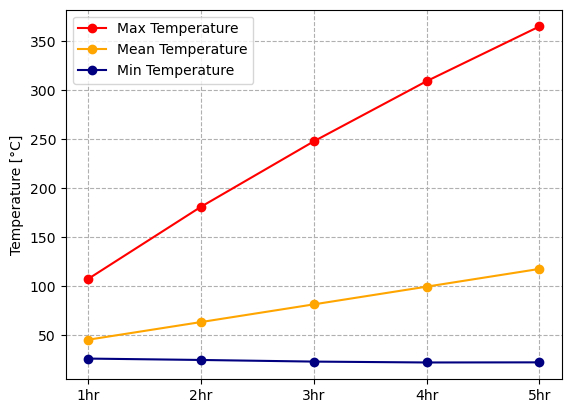

In [7]:
max_temp = []
min_temp = []
mean_temp = []

for results in results_list:
    max_temp = np.append(max_temp, np.max(results.Temperature))
    min_temp = np.append(min_temp, np.min(results.Temperature))
    mean_temp = np.append(mean_temp, np.mean(results.Temperature))

hrs = ['1hr', '2hr', '3hr', '4hr', '5hr']

plt.plot(hrs, max_temp-273.15, label='Max Temperature', marker='o', color='r')
plt.plot(hrs, mean_temp-273.15, label='Mean Temperature', marker='o', color='orange')
plt.plot(hrs, min_temp-273.15, label='Min Temperature', marker='o', color='navy')
plt.grid(ls='--')
plt.legend()
plt.ylabel('Temperature [°C]')
plt.show()

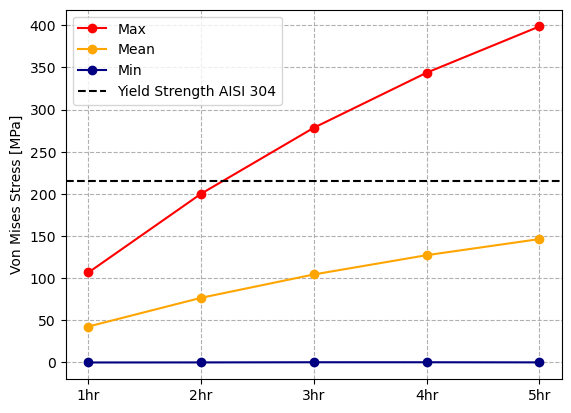

In [8]:
max_vm = []
min_vm = []
mean_vm = []

for results in results_list:
    max_vm = np.append(max_vm, np.max(results.vonMises))
    min_vm = np.append(min_vm, np.min(results.vonMises))
    mean_vm = np.append(mean_vm, np.mean(results.vonMises))

hrs = ['1hr', '2hr', '3hr', '4hr', '5hr']

plt.plot(hrs, max_vm, label='Max', marker='o', color='r')
plt.plot(hrs, mean_vm, label='Mean', marker='o', color='orange')
plt.plot(hrs, min_vm, label='Min', marker='o', color='navy')
plt.axhline(215, color='k', ls='--', label='Yield Strength AISI 304')
plt.grid(ls='--')
plt.legend()
plt.ylabel('Von Mises Stress [MPa]')
plt.show()

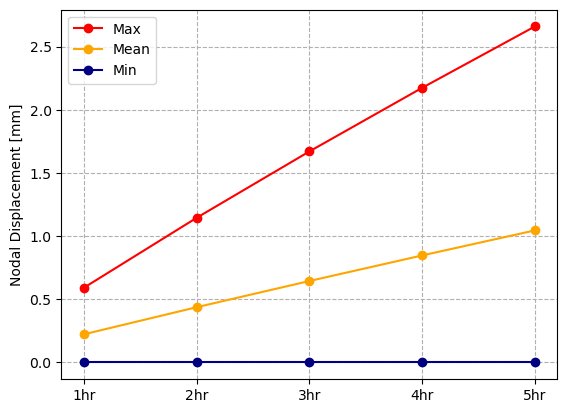

In [9]:
max_d = []
min_d = []
mean_d = []

for results in results_list:
    max_d = np.append(max_d, np.max(results.DisplacementLengths))
    min_d = np.append(min_d, np.min(results.DisplacementLengths))
    mean_d = np.append(mean_d, np.mean(results.DisplacementLengths))

hrs = ['1hr', '2hr', '3hr', '4hr', '5hr']

plt.plot(hrs, max_d, label='Max', marker='o', color='r')
plt.plot(hrs, mean_d, label='Mean', marker='o', color='orange')
plt.plot(hrs, min_d, label='Min', marker='o', color='navy')
plt.grid(ls='--')
plt.legend()
plt.ylabel('Nodal Displacement [mm]')
plt.show()

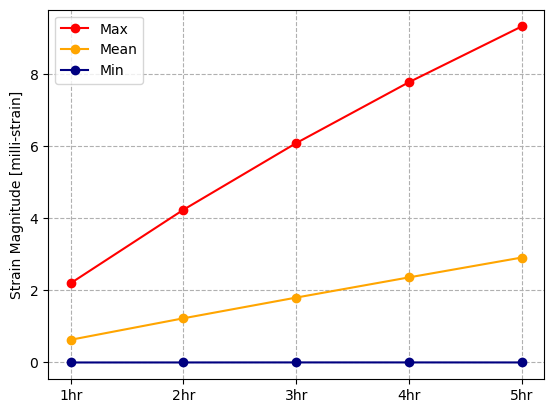

In [10]:
max_s = []
min_s = []
mean_s = []

for results in results_list:
    xx = np.array(results.NodeStrainXX); xy = np.array(results.NodeStrainXY)
    xz = np.array(results.NodeStrainXZ); yy = np.array(results.NodeStrainYY)
    yz = np.array(results.NodeStrainYZ); zz = np.array(results.NodeStrainZZ)
    strain = np.sqrt(xx**2 + yy**2 + zz**2 + 2*(xy**2 + xz**2 + yz**2))
    max_s = np.append(max_s, np.max(strain))
    min_s = np.append(min_s, np.min(strain))
    mean_s = np.append(mean_s, np.mean(strain))

hrs = ['1hr', '2hr', '3hr', '4hr', '5hr']

plt.plot(hrs, 1e3*max_s, label='Max', marker='o', color='r')
plt.plot(hrs, 1e3*mean_s, label='Mean', marker='o', color='orange')
plt.plot(hrs, 1e3*min_s, label='Min', marker='o', color='navy')
plt.grid(ls='--')
plt.legend()
plt.ylabel('Strain Magnitude [milli-strain]')
plt.show()